In [1]:
import keras
import tensorflow


In [2]:
import cv2

In [3]:
import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import sklearn
from keras.layers import Conv2D,Activation,MaxPool2D,Dense,Flatten,Dropout

import warnings
warnings.filterwarnings('ignore')

In [4]:
categories=["01_palm","02_l","03_fist","04_fist_moved","05_thumb","06_index","07_ok","08_palm_moved","09_c","10_down"]
img_size=50

data_path="C:/Users/abhin/Downloads/archive (1)/leapGestRecog/leapGestRecog"

In [5]:
image_data=[]
for dr in os.listdir(data_path):
    for category in categories:
        class_index=categories.index(category)
        path=os.path.join(data_path,dr,category)
        for img in os.listdir(path):
            try:
                img_arr=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr,(img_size,img_size)),class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [6]:
import random
random.shuffle(image_data)

In [7]:
input_data=[]
label=[]
for x,y in image_data:
    input_data.append(x)
    label.append(y)

In [8]:
label[:10]

[6, 7, 0, 3, 8, 4, 3, 5, 3, 5]

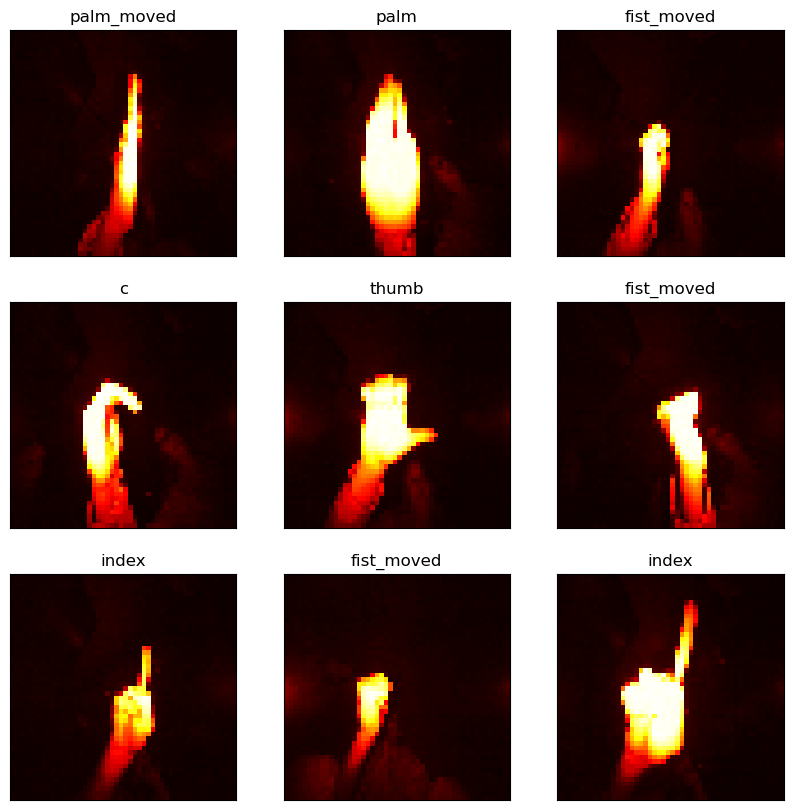

In [9]:
plt.figure(1,figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0],cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]][3:])
plt.show()

In [10]:
input_data=np.array(input_data)
label=np.array(label)
input_data=input_data/255.0
input_data.shape


(20000, 50, 50)

In [11]:
label=keras.utils.to_categorical(label,num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int8)

In [12]:
input_data.shape=(-1,img_size,img_size,1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input_data,label,test_size=0.3,random_state=0)


In [14]:
model=keras.models.Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(img_size,img_size,1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [15]:
model.fit(x_train,y_train,epochs=7,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/7
438/438 [==============================] - 168s 383ms/step - loss: 0.2819 - accuracy: 0.9131 - val_loss: 0.0156 - val_accuracy: 0.9970
Epoch 2/7
438/438 [==============================] - 161s 369ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.0045 - val_accuracy: 0.9985
Epoch 3/7
438/438 [==============================] - 160s 366ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 4/7
438/438 [==============================] - 156s 355ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9990
Epoch 5/7
438/438 [==============================] - 162s 369ms/step - loss: 9.7008e-04 - accuracy: 0.9996 - val_loss: 0.0012 - val_accuracy: 0.9993
Epoch 6/7
438/438 [==============================] - 159s 363ms/step - loss: 7.4977e-04 - accuracy: 0.9999 - val_loss: 2.6165e-04 - val_accuracy: 1.0000
Epoch 7/7
438/438 [==============================] - 163s 372ms/step - loss: 4.0519e-04 - accuracy: 0.9998 - val_loss:

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0

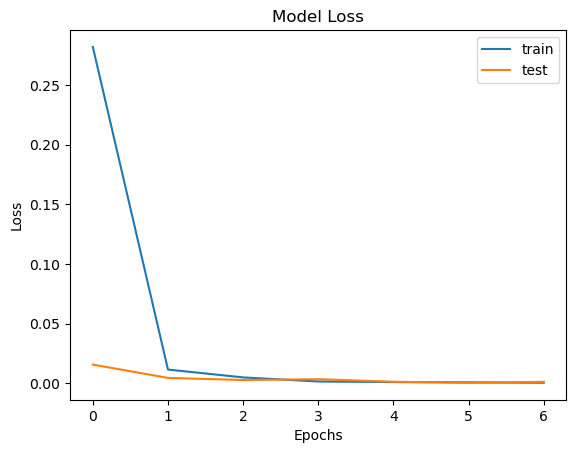

In [17]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

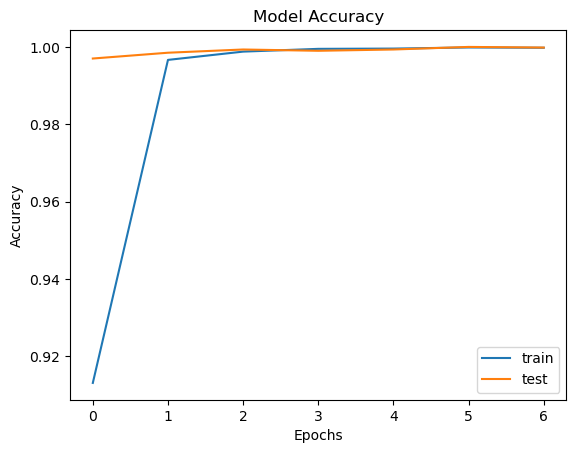

In [18]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

In [19]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print('Test accuracy:{:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 15s 79ms/step - loss: 0.0012 - accuracy: 0.9998
Test accuracy:99.98%


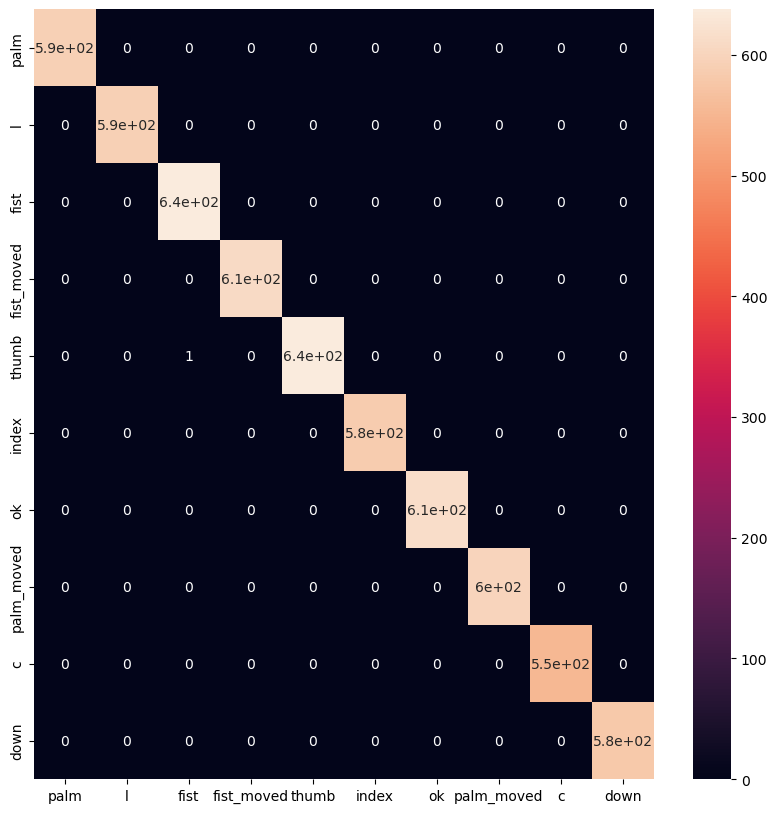

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cat=[c[3:] for c in categories]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test), axis=1))
sns.heatmap(cm, annot=True, xticklabels=cat, yticklabels=cat)
plt.show()